In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import seaborn as sns

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn import preprocessing

from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import GridSearchCV
import time

from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import time
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:

path ="/content/drive/MyDrive/dataset/dataset_sdn.csv"
data = pd.read_csv(path)
data1 = data
data.head(5)

,dt,switch,src,dst,pktcount,bytecount,dur,dur_nsec,tot_dur,flows,...,pktrate,Pairflow,Protocol,port_no,tx_bytes,rx_bytes,tx_kbps,rx_kbps,tot_kbps,label
0,11425,1,10.0.0.1,10.0.0.8,45304,48294064,100,716000000,1.010000e+11,3,...,451,0,UDP,3,143928631,3917,0,0.0,0.0,0
1,11605,1,10.0.0.1,10.0.0.8,126395,134737070,280,734000000,2.810000e+11,2,...,451,0,UDP,4,3842,3520,0,0.0,0.0,0
2,11425,1,10.0.0.2,10.0.0.8,90333,96294978,200,744000000,2.010000e+11,3,...,451,0,UDP,1,3795,1242,0,0.0,0.0,0
3,11425,1,10.0.0.2,10.0.0.8,90333,96294978,200,744000000,2.010000e+11,3,...,451,0,UDP,2,3688,1492,0,0.0,0.0,0
4,11425,1,10.0.0.2,10.0.0.8,90333,96294978,200,744000000,2.010000e+11,3,...,451,0,UDP,3,3413,3665,0,0.0,0.0,0


In [ ]:
#shows rows and columns
data.shape

(104345, 23)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104345 entries, 0 to 104344
Data columns (total 23 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   dt           104345 non-null  int64  
 1   switch       104345 non-null  int64  
 2   src          104345 non-null  object 
 3   dst          104345 non-null  object 
 4   pktcount     104345 non-null  int64  
 5   bytecount    104345 non-null  int64  
 6   dur          104345 non-null  int64  
 7   dur_nsec     104345 non-null  int64  
 8   tot_dur      104345 non-null  float64
 9   flows        104345 non-null  int64  
 10  packetins    104345 non-null  int64  
 11  pktperflow   104345 non-null  int64  
 12  byteperflow  104345 non-null  int64  
 13  pktrate      104345 non-null  int64  
 14  Pairflow     104345 non-null  int64  
 15  Protocol     104345 non-null  object 
 16  port_no      104345 non-null  int64  
 17  tx_bytes     104345 non-null  int64  
 18  rx_bytes     104345 non-

In [ ]:
##### Here we see that the label contains boolean values: 0 - Benign, 1-Maliciuous
data.label.unique()

array([0, 1])

In [ ]:
data.label.value_counts()

label
0    63561
1    40784
Name: count, dtype: int64

<Axes: ylabel='count'>

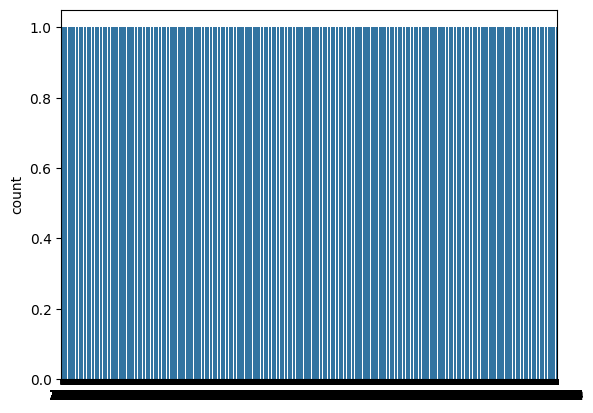

In [ ]:
label_dict = dict(data.label.value_counts())
sns.countplot(data.label)

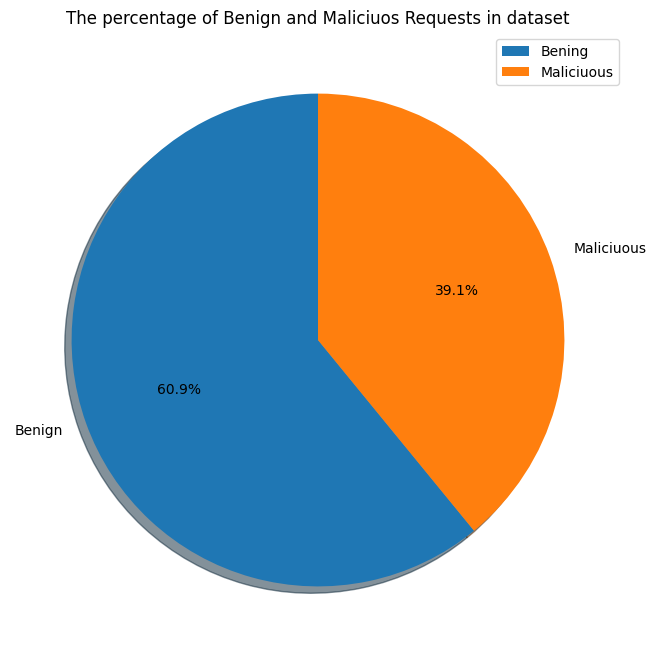

In [ ]:
labels = ["Benign",'Maliciuous']
sizes = [dict(data.label.value_counts())[0], dict(data.label.value_counts())[1]]
plt.figure(figsize = (13,8))
plt.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
plt.legend(["Bening", "Maliciuous"])
plt.title('The percentage of Benign and Maliciuos Requests in dataset')
plt.show()

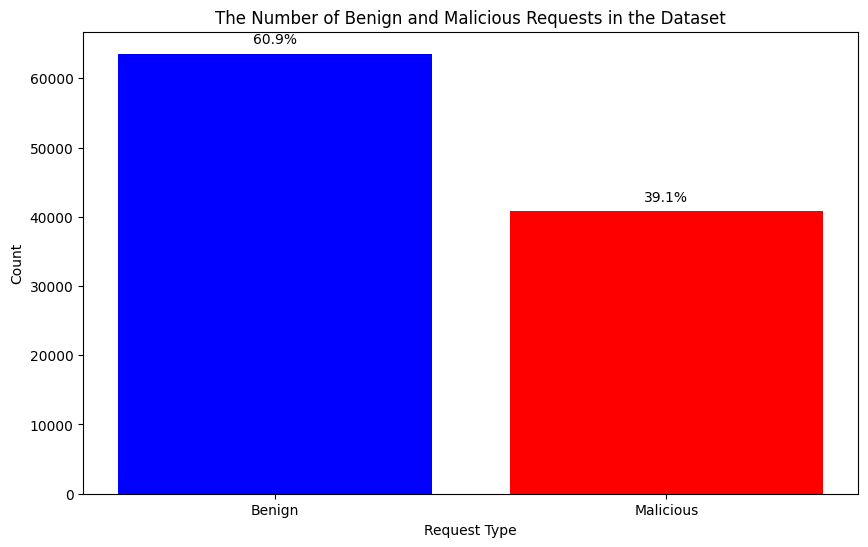

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Count the number of occurrences for each label
label_counts = data['label'].value_counts()

# Calculate percentages
total = sum(label_counts)
percentages = [count / total * 100 for count in label_counts]

# Create a bar chart
plt.figure(figsize=(10,6))
bars = plt.bar(label_counts.index, label_counts.values, color=['blue', 'red'])

# Add titles and labels
plt.title('The Number of Benign and Malicious Requests in the Dataset')
plt.xlabel('Request Type')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1], labels=['Benign', 'Malicious'])

# Add percentage labels on the bars
for bar, percentage in zip(bars, percentages):
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + total*0.01, f'{percentage:.1f}%', ha='center', va='bottom')

# Display the plot
plt.show()


In [ ]:
data.describe()

,dt,switch,pktcount,bytecount,dur,dur_nsec,tot_dur,flows,packetins,pktperflow,byteperflow,pktrate,Pairflow,port_no,tx_bytes,rx_bytes,tx_kbps,rx_kbps,tot_kbps,label
count,104345.000000,104345.000000,104345.000000,1.043450e+05,104345.000000,1.043450e+05,1.043450e+05,104345.000000,104345.000000,104345.000000,1.043450e+05,104345.000000,104345.000000,104345.000000,1.043450e+05,1.043450e+05,104345.000000,103839.000000,103839.000000,104345.000000
mean,17927.514169,4.214260,52860.954746,3.818660e+07,321.497398,4.613880e+08,3.218865e+11,5.654234,5200.383468,6381.715291,4.716150e+06,212.210676,0.600987,2.331094,9.325264e+07,9.328039e+07,998.899756,1003.811420,2007.578742,0.390857
std,11977.642655,1.956327,52023.241460,4.877748e+07,283.518232,2.770019e+08,2.834029e+11,2.950036,5257.001450,7404.777808,7.560116e+06,246.855123,0.489698,1.084333,1.519380e+08,1.330004e+08,2423.471618,2054.887034,3144.437173,0.487945
min,2488.000000,1.000000,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,2.000000,4.000000,-130933.000000,-1.464426e+08,-4365.000000,0.000000,1.000000,2.527000e+03,8.560000e+02,0.000000,0.000000,0.000000,0.000000
25%,7098.000000,3.000000,808.000000,7.957600e+04,127.000000,2.340000e+08,1.270000e+11,3.000000,1943.000000,29.000000,2.842000e+03,0.000000,0.000000,1.000000,4.743000e+03,3.539000e+03,0.000000,0.000000,0.000000,0.000000
50%,11905.000000,4.000000,42828.000000,6.471930e+06,251.000000,4.180000e+08,2.520000e+11,5.000000,3024.000000,8305.000000,5.521680e+05,276.000000,1.000000,2.000000,4.219610e+06,1.338339e+07,0.000000,0.000000,4.000000,0.000000
75%,29952.000000,5.000000,94796.000000,7.620354e+07,412.000000,7.030000e+08,4.130000e+11,7.000000,7462.000000,10017.000000,9.728112e+06,333.000000,1.000000,3.000000,1.356398e+08,1.439277e+08,251.000000,557.000000,3838.000000,1.000000
max,42935.000000,10.000000,260006.000000,1.471280e+08,1881.000000,9.990000e+08,1.880000e+12,17.000000,25224.000000,19190.000000,1.495387e+07,639.000000,1.000000,5.000000,1.269982e+09,9.905962e+08,20580.000000,16577.000000,20580.000000,1.000000


Text(0.5, 1.0, 'Features which has NuLL values')

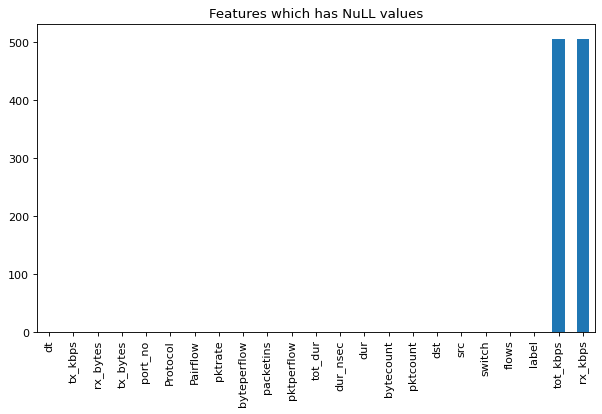

In [ ]:
# Let's look at the vizualisation of Null valued features
figure(figsize=(9, 5), dpi=80)
data[data.columns[data.isna().sum() >= 0]].isna().sum().sort_values().plot.bar()
plt.title("Features which has NuLL values")

In [ ]:
data.isnull().sum()

dt               0
switch           0
src              0
dst              0
pktcount         0
bytecount        0
dur              0
dur_nsec         0
tot_dur          0
flows            0
packetins        0
pktperflow       0
byteperflow      0
pktrate          0
Pairflow         0
Protocol         0
port_no          0
tx_bytes         0
rx_bytes         0
tx_kbps          0
rx_kbps        506
tot_kbps       506
label            0
dtype: int64

In [4]:
#hadling null values

mean_rx_kbps = data['rx_kbps'].mean()
mean_tot_kbps = data['tot_kbps'].mean()

data['rx_kbps'].fillna(mean_rx_kbps, inplace=True)
data['tot_kbps'].fillna(mean_tot_kbps, inplace=True)


In [5]:
print(data.isnull().sum())


dt             0
switch         0
src            0
dst            0
pktcount       0
bytecount      0
dur            0
dur_nsec       0
tot_dur        0
flows          0
packetins      0
pktperflow     0
byteperflow    0
pktrate        0
Pairflow       0
Protocol       0
port_no        0
tx_bytes       0
rx_bytes       0
tx_kbps        0
rx_kbps        0
tot_kbps       0
label          0
dtype: int64


In [ ]:
#### Let's support which columns NUMERIC and which is OBJECT

numeric_df = data.select_dtypes(include=['int64', 'float64'])
object_df = data.select_dtypes(include=['object'])
numeric_cols = numeric_df.columns
object_cols = object_df.columns
print('Numeric Columns: ')
print(numeric_cols, '\n')
print('Object Columns: ')
print(object_cols, '\n')
print('Number of Numeric Features: ', len(numeric_cols))
print('Number of Object Features: ', len(object_cols))

Numeric Columns: 
Index(['dt', 'switch', 'pktcount', 'bytecount', 'dur', 'dur_nsec', 'tot_dur',
       'flows', 'packetins', 'pktperflow', 'byteperflow', 'pktrate',
       'Pairflow', 'port_no', 'tx_bytes', 'rx_bytes', 'tx_kbps', 'rx_kbps',
       'tot_kbps', 'label'],
      dtype='object') 

Object Columns: 
Index(['src', 'dst', 'Protocol'], dtype='object') 

Number of Numeric Features:  20
Number of Object Features:  3


In [ ]:
object_df.head()




,src,dst,Protocol
0,10.0.0.1,10.0.0.8,UDP
1,10.0.0.1,10.0.0.8,UDP
2,10.0.0.2,10.0.0.8,UDP
3,10.0.0.2,10.0.0.8,UDP
4,10.0.0.2,10.0.0.8,UDP


Text(0.5, 1.0, 'Number of all reqests')

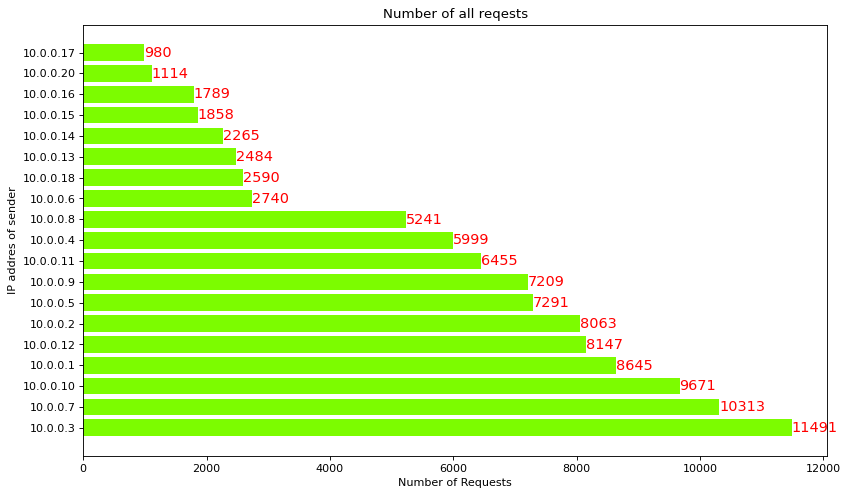

In [ ]:
#### Let's look at Oblect columns (Source Destination Protocol)

figure(figsize=(12, 7), dpi=80)
plt.barh(list(dict(data.src.value_counts()).keys()), dict(data.src.value_counts()).values(), color='lawngreen')

for idx, val in enumerate(dict(data.src.value_counts()).values()):
    plt.text(x = val, y = idx-0.2, s = str(val), color='r', size = 13)

plt.xlabel('Number of Requests')
plt.ylabel('IP addres of sender')
plt.title('Number of all reqests')

Text(0.5, 1.0, 'Number of Attack requests')

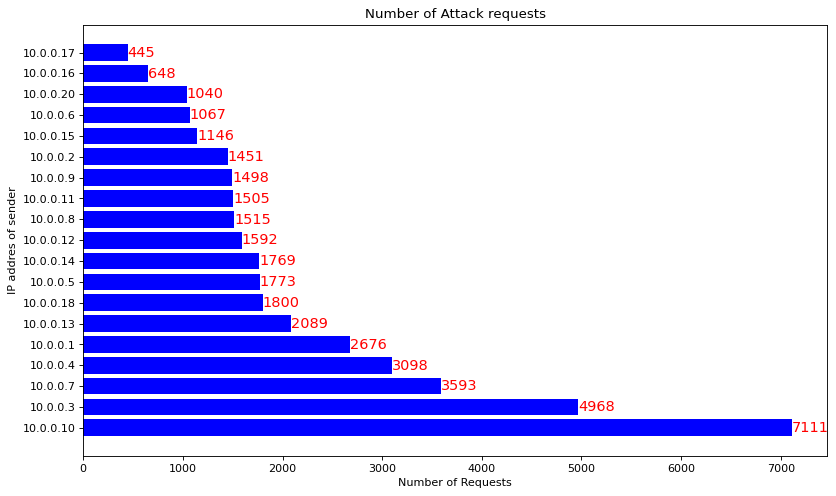

In [ ]:
figure(figsize=(12, 7), dpi=80)
plt.barh(list(dict(data[data.label == 1].src.value_counts()).keys()), dict(data[data.label == 1].src.value_counts()).values(), color='blue')

for idx, val in enumerate(dict(data[data.label == 1].src.value_counts()).values()):
    plt.text(x = val, y = idx-0.2, s = str(val), color='r', size = 13)

plt.xlabel('Number of Requests')
plt.ylabel('IP addres of sender')
plt.title('Number of Attack requests')

Text(0.5, 1.0, 'Number of requests from different IP adress')

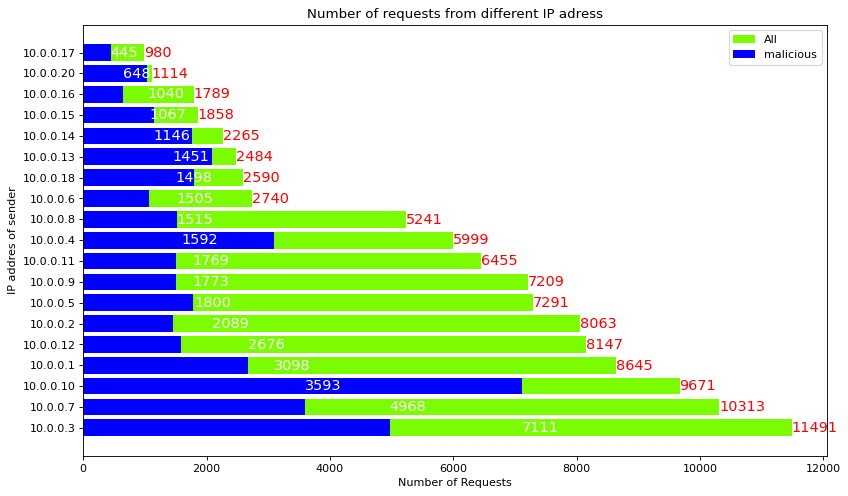

In [ ]:
figure(figsize=(12, 7), dpi=80)
plt.barh(list(dict(data.src.value_counts()).keys()), dict(data.src.value_counts()).values(), color='lawngreen')
plt.barh(list(dict(data[data.label == 1].src.value_counts()).keys()), dict(data[data.label == 1].src.value_counts()).values(), color='blue')

for idx, val in enumerate(dict(data.src.value_counts()).values()):
    plt.text(x = val, y = idx-0.2, s = str(val), color='r', size = 13)

for idx, val in enumerate(dict(data[data.label == 1].src.value_counts()).values()):
    plt.text(x = val, y = idx-0.2, s = str(val), color='w', size = 13)


plt.xlabel('Number of Requests')
plt.ylabel('IP addres of sender')
plt.legend(['All','malicious'])
plt.title('Number of requests from different IP adress')

Text(0.5, 1.0, 'The number of requests from different protocols')

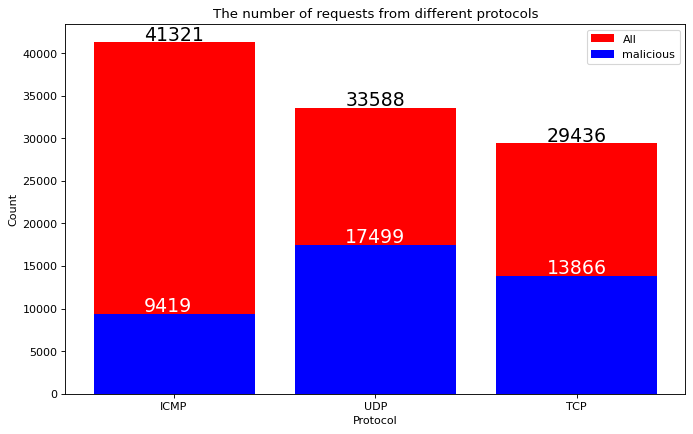

In [ ]:
figure(figsize=(10, 6), dpi=80)
plt.bar(list(dict(data.Protocol.value_counts()).keys()), dict(data.Protocol.value_counts()).values(), color='r')
plt.bar(list(dict(data[data.label == 1].Protocol.value_counts()).keys()), dict(data[data.label == 1].Protocol.value_counts()).values(), color='b')

plt.text(x = 0 - 0.15, y = 41321 + 200, s = str(41321), color='black', size=17)
plt.text(x = 1 - 0.15, y = 33588 + 200, s = str(33588), color='black', size=17)
plt.text(x = 2 - 0.15, y = 29436 + 200, s = str(29436), color='black', size=17)

plt.text(x = 0 - 0.15, y = 9419 + 200, s = str(9419), color='w', size=17)
plt.text(x = 1 - 0.15, y = 17499 + 200, s = str(17499), color='w', size=17)
plt.text(x = 2 - 0.15, y = 13866 + 200, s = str(13866), color='w', size=17)

plt.xlabel('Protocol')
plt.ylabel('Count')
plt.legend(['All', 'malicious'])
plt.title('The number of requests from different protocols')

In [ ]:

# #perform label encoding
# import pandas as pd
# from sklearn.preprocessing import LabelEncoder

# # Assuming you have your data in a pandas DataFrame named 'data'
# categorical_cols = data.select_dtypes(include=['object'])

# # Create a LabelEncoder object for each categorical column
# encoders = {}
# for col in categorical_cols:
#     encoders[col] = LabelEncoder()

# # Encode each categorical column
# for col in categorical_cols:
#     data[col] = encoders[col].fit_transform(data[col])

In [ ]:
data.head(10)

,dt,switch,src,dst,pktcount,bytecount,dur,dur_nsec,tot_dur,flows,...,pktrate,Pairflow,Protocol,port_no,tx_bytes,rx_bytes,tx_kbps,rx_kbps,tot_kbps,label
0,11425,1,0,16,45304,48294064,100,716000000,1.010000e+11,3,...,451,0,2,3,143928631,3917,0,0.0,0.0,0
1,11605,1,0,16,126395,134737070,280,734000000,2.810000e+11,2,...,451,0,2,4,3842,3520,0,0.0,0.0,0
2,11425,1,10,16,90333,96294978,200,744000000,2.010000e+11,3,...,451,0,2,1,3795,1242,0,0.0,0.0,0
3,11425,1,10,16,90333,96294978,200,744000000,2.010000e+11,3,...,451,0,2,2,3688,1492,0,0.0,0.0,0
4,11425,1,10,16,90333,96294978,200,744000000,2.010000e+11,3,...,451,0,2,3,3413,3665,0,0.0,0.0,0
5,11425,1,10,16,90333,96294978,200,744000000,2.010000e+11,3,...,451,0,2,1,3795,1402,0,0.0,0.0,0
6,11425,1,0,16,45304,48294064,100,716000000,1.010000e+11,3,...,451,0,2,4,3665,3413,0,0.0,0.0,0
7,11425,1,0,16,45304,48294064,100,716000000,1.010000e+11,3,...,451,0,2,1,3775,1492,0,0.0,0.0,0
8,11425,1,0,16,45304,48294064,100,716000000,1.010000e+11,3,...,451,0,2,2,3845,1402,0,0.0,0.0,0
9,11425,1,10,16,90333,96294978,200,744000000,2.010000e+11,3,...,451,0,2,4,354583059,4295,16578,0.0,16578.0,0


In [6]:
# perform one-hot encoding on the Data
#it performs better than label encoding
data = pd.get_dummies(data)
data.head(5)

,dt,switch,pktcount,bytecount,dur,dur_nsec,tot_dur,flows,packetins,pktperflow,...,dst_10.0.0.3,dst_10.0.0.4,dst_10.0.0.5,dst_10.0.0.6,dst_10.0.0.7,dst_10.0.0.8,dst_10.0.0.9,Protocol_ICMP,Protocol_TCP,Protocol_UDP
0,11425,1,45304,48294064,100,716000000,1.010000e+11,3,1943,13535,...,False,False,False,False,False,True,False,False,False,True
1,11605,1,126395,134737070,280,734000000,2.810000e+11,2,1943,13531,...,False,False,False,False,False,True,False,False,False,True
2,11425,1,90333,96294978,200,744000000,2.010000e+11,3,1943,13534,...,False,False,False,False,False,True,False,False,False,True
3,11425,1,90333,96294978,200,744000000,2.010000e+11,3,1943,13534,...,False,False,False,False,False,True,False,False,False,True
4,11425,1,90333,96294978,200,744000000,2.010000e+11,3,1943,13534,...,False,False,False,False,False,True,False,False,False,True


In [ ]:
#### Let's support which columns NUMERIC and which is OBJECT

numeric_df = data.select_dtypes(include=['int64', 'float64'])
object_df = data.select_dtypes(include=['object'])
numeric_cols = numeric_df.columns
object_cols = object_df.columns
print('Numeric Columns: ')
print(numeric_cols, '\n')
print('Object Columns: ')
print(object_cols, '\n')
print('Number of Numeric Features: ', len(numeric_cols))
print('Number of Object Features: ', len(object_cols))

Numeric Columns: 
Index(['dt', 'switch', 'pktcount', 'bytecount', 'dur', 'dur_nsec', 'tot_dur',
       'flows', 'packetins', 'pktperflow', 'byteperflow', 'pktrate',
       'Pairflow', 'port_no', 'tx_bytes', 'rx_bytes', 'tx_kbps', 'rx_kbps',
       'tot_kbps', 'label'],
      dtype='object') 

Object Columns: 
Index([], dtype='object') 

Number of Numeric Features:  20
Number of Object Features:  0


In [ ]:
df = data.copy()

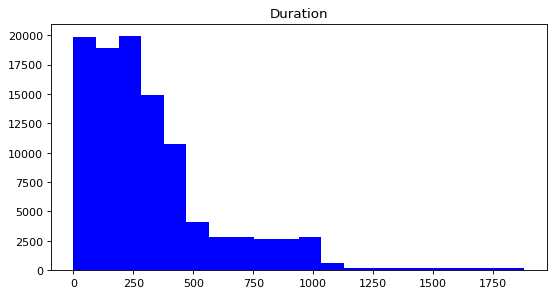

In [ ]:
figure(figsize=(8, 4), dpi=80)
plt.hist(df.dur, bins=20, color='b')
plt.title('Duration')
plt.show()

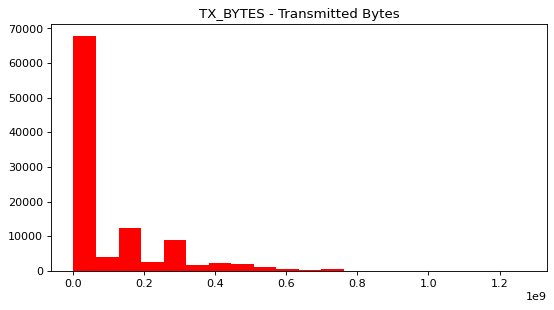

In [ ]:
figure(figsize=(8, 4), dpi=80)
plt.hist(df.tx_bytes, bins=20, color='r')
plt.title('TX_BYTES - Transmitted Bytes')
plt.show()

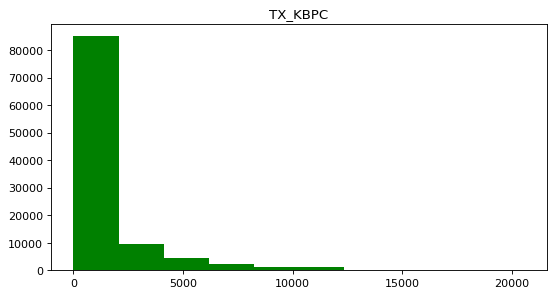

In [ ]:
figure(figsize=(8, 4), dpi=80)
plt.hist(df.tx_kbps, bins=10, color='g')
plt.title('TX_KBPC')
plt.show()

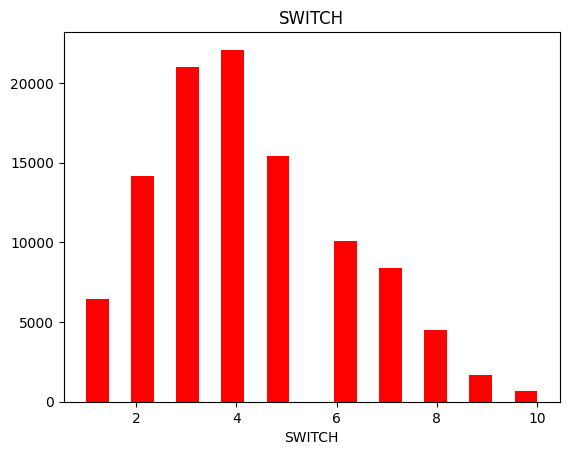

In [ ]:
plt.hist(df.switch, bins=20, color='r')
plt.title('SWITCH')
plt.xlabel('SWITCH')
plt.show()

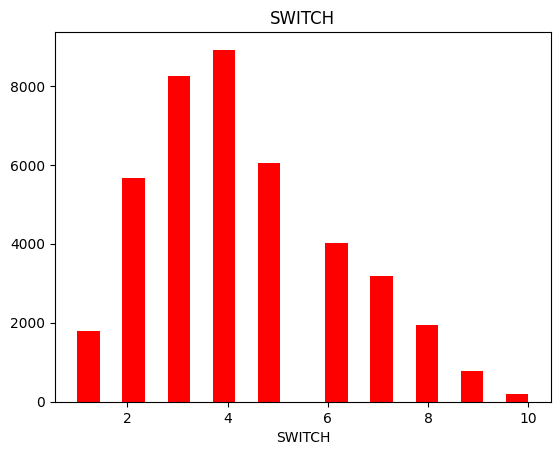

In [ ]:
plt.hist(df[df['label'] == 1].switch, bins=20, color='r')
plt.title('SWITCH')
plt.xlabel('SWITCH')
plt.show()

In [9]:
class Model:
    global y
    def __init__(self, data):
        self.data = data
        X = preprocessing.StandardScaler().fit(self.data).transform(self.data)
        self.X_train, self.X_test, self.y_train, self.y_test = train_test_split(X, y, random_state=42, test_size=0.3)

    def LogisticRegression(self):
        solvers = ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
        start_time = time.time()
        results_lr = []
        accuracy_list = []
        for solver in solvers:
            LR = LogisticRegression(C=0.03, solver=solver).fit(self.X_train, self.y_train)
            predicted_lr = LR.predict(self.X_test)
            accuracy_lr = accuracy_score(self.y_test, predicted_lr)
            #print("Accuracy: %.2f%%" % (accuracy_lr * 100.0))
            #print('################################################################')
            results_lr.append({'solver' : solver, 'accuracy': str(round(accuracy_lr * 100, 2)) + "%",
                                  'Coefficients': {'W' : LR.coef_, 'b': LR.intercept_}})

            accuracy_list.append(accuracy_lr)

        solver_name = solvers[accuracy_list.index(max(accuracy_list))]
        LR = LogisticRegression(C=0.03, solver=solver_name).fit(self.X_train,self.y_train)
        predicted_lr = LR.predict(self.X_test)
        accuracy_lr = accuracy_score(self.y_test, predicted_lr)
        print("Accuracy: %.2f%%" % (accuracy_lr * 100.0), '\n')
        print("########################################################################")
        print('Best solver is : ', solver_name)
        print("########################################################################")
        print(classification_report(predicted_lr, self.y_test), '\n')
        print("########################################################################")
        print("--- %s seconds --- time for LogisticRegression" % (time.time() - start_time))


    def SupportVectorMachine(self):
        start_time = time.time()
        accuracy_list = []
        result_svm = []
        kernels = ['linear', 'poly','rbf', 'sigmoid']
        #kernels = ['rbf']
        for kernel in kernels:
            SVM = svm.SVC(kernel=kernel).fit(self.X_train, self.y_train)
            predicted_svm = SVM.predict(self.X_test)
            accuracy_svm = accuracy_score(self.y_test, predicted_svm)
            result_svm.append({"kernel" : kernel, "accuracy": f"{round(accuracy_svm*100,2)}%"})
            print("Accuracy: %.2f%%" % round((accuracy_svm * 100.0),2))
            print('######################################################################')
            accuracy_list.append(accuracy_svm)

        kernel_name = kernels[accuracy_list.index(max(accuracy_list))]
        SVM = svm.SVC(kernel=kernel_name).fit(self.X_train, self.y_train)
        predicted_svm = SVM.predict(self.X_test)
        accuracy_svm = accuracy_score(self.y_test, predicted_svm)
        print(f"Accuracy of SVM model {round(accuracy_svm,2)*100}%", '\n')
        print("########################################################################")
        print('best kernel is : ', kernel_name)
        print("########################################################################")
        print(classification_report(predicted_svm, self.y_test))
        print("########################################################################")
        print("--- %s seconds ---" % (time.time() - start_time))

    def KNearetsNeighbor(self):
        start_time = time.time()
        Ks = 12
        accuracy_knn = np.zeros((Ks-1))
        std_acc = np.zeros((Ks-1))
        #print(accuracy_knn)
        for n in range(1,Ks):

            #Train Model and Predict
            neigh = KNeighborsClassifier(n_neighbors = n).fit(self.X_train,self.y_train)
            yhat=neigh.predict(self.X_test)
            accuracy_knn[n-1] = metrics.accuracy_score(self.y_test, yhat)


            std_acc[n-1]=np.std(yhat==self.y_test)/np.sqrt(yhat.shape[0])

        #print(accuracy_knn,'\n\n') # courseranyn ozinde tek osy gana jazylyp turdy
        #print(std_acc)
        #accuracy_knn[0] = 0
        plt.figure(figsize=(10,6))
        plt.plot(range(1,Ks),accuracy_knn,'g')
        plt.fill_between(range(1,Ks),accuracy_knn - 1 * std_acc,accuracy_knn + 1 * std_acc, alpha=0.10)
        plt.fill_between(range(1,Ks),accuracy_knn - 3 * std_acc,accuracy_knn + 3 * std_acc, alpha=0.10,color="green")
        plt.legend(('Accuracy ', '+/- 1xstd','+/- 3xstd'))
        plt.ylabel('Accuracy ')
        plt.xlabel('Number of Neighbors (K)')
        plt.tight_layout()
        plt.show()


        knnc = KNeighborsClassifier()
        knnc_search = GridSearchCV(knnc, param_grid={'n_neighbors': [3, 5, 10],
                                             'weights': ['uniform', 'distance'],
                                             'metric': ['euclidean', 'manhattan']},
                           n_jobs=-1, cv=3, scoring='accuracy', verbose=2)

        knnc_search.fit(self.X_train, self.y_train)
        #print(knnc_search.best_params_)
        #print(knnc_search.best_score_)
        n_neighbors = knnc_search.best_params_['n_neighbors']
        weights = knnc_search.best_params_['weights']
        metric = knnc_search.best_params_['metric']
        KNN = KNeighborsClassifier(n_neighbors=n_neighbors, metric=metric, weights=weights).fit(self.X_train,self.y_train)

        predicted_knn = KNN.predict(self.X_test)
        accuracy_knn = metrics.accuracy_score(self.y_test, predicted_knn)
        print(f"Accuracy of KNN model {round(accuracy_knn,2)*100}%", '\n')
        print("########################################################################")
        print(classification_report(predicted_knn, self.y_test))
        print("########################################################################")
        print("--- %s seconds ---" % (time.time() - start_time))


    def DecisionTree(self):
        start_time = time.time()
        tree = DecisionTreeClassifier()
        dt_search = GridSearchCV(tree, param_grid={'criterion' : ['gini', 'entropy'],
                                           'max_depth' : [2,3,4,5,6,7,8, 9, 10],
                                           'max_leaf_nodes' : [2,3,4,5,6,7,8,9,10, 11]},
                           n_jobs=-1, cv=5, scoring='accuracy', verbose=2)

        dt_search.fit(self.X_train, self.y_train)

        criterion = dt_search.best_params_['criterion']
        max_depth = dt_search.best_params_['max_depth']
        max_leaf_nodes = dt_search.best_params_['max_leaf_nodes']

        dtree = DecisionTreeClassifier(criterion=criterion,
                                       max_depth=max_depth,
                                       max_leaf_nodes=max_leaf_nodes).fit(self.X_train, self.y_train)
        predicted_dt = dtree.predict(self.X_test)
        accuracy_dt = metrics.accuracy_score(self.y_test, predicted_dt)
        print(f"criterion: {criterion}, max depth: {max_depth}, max_leaf: {max_leaf_nodes}")
        print(f"The Accuracy is : {round(accuracy_dt * 100,2)}%")
        print("########################################################################")
        print(classification_report(predicted_dt, self.y_test))
        print("########################################################################")

        print("--- %s seconds ---" % (time.time() - start_time))

    def RandomForest(self):
        start_time = time.time()

        RF = RandomForestClassifier(criterion='gini',
                                    n_estimators=500,
                                    min_samples_split=10,
                                    # min_samples_leaf=1,
                                    max_features='auto',
                                    oob_score=True,
                                    random_state=1,
                                    n_jobs=-1).fit(self.X_train, self.y_train)

        predicted_rf = RF.predict(self.X_test)
        rf_accuracy = accuracy_score(self.y_test, predicted_rf)
        print(f"Accuracy of RF is : {round(rf_accuracy*100, 2)}%", '\n')
        print("########################################################################")
        print(classification_report(predicted_rf, self.y_test))
        print("########################################################################")

        # Generate confusion matrix
        cm = confusion_matrix(self.y_test, predicted_rf)
        print("Confusion Matrix:\n", cm)

        # Plot confusion matrix
        plt.figure(figsize=(10, 7))
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
        plt.xlabel('Predicted')
        plt.ylabel('True')
        plt.title('Confusion Matrix - Random Forest')
        plt.show()

        print("--- %s seconds ---" % (time.time() - start_time))

In [ ]:
df = data.copy()
df = df.dropna() #removes any rows from the DataFrame df that contain missing values and returns a new DataFrame with those rows removed.

In [ ]:
X = df.drop(['label'], axis=1)
y = df.label

In [ ]:
#X = pd.get_dummies(X)
#he code X = pd.get_dummies(X) in Python using the pandas library performs one-hot encoding on the DataFrame X

In [ ]:
M = Model(X)

In [ ]:
## Logistic Regression(Without FS)
M.LogisticRegression()

Accuracy: 84.12% 

########################################################################
Best solver is :  newton-cg
########################################################################
              precision    recall  f1-score   support

           0       0.89      0.85      0.87     19872
           1       0.76      0.82      0.79     11280

    accuracy                           0.84     31152
   macro avg       0.83      0.84      0.83     31152
weighted avg       0.84      0.84      0.84     31152
 

########################################################################
--- 23.974660634994507 seconds --- time for LogisticRegression


In [ ]:
M.DecisionTree()

Fitting 5 folds for each of 180 candidates, totalling 900 fits
criterion: gini, max depth: 8, max_leaf: 11
The Accuracy is : 98.38%
########################################################################
              precision    recall  f1-score   support

           0       0.98      1.00      0.99     18664
           1       1.00      0.96      0.98     12640

    accuracy                           0.98     31304
   macro avg       0.99      0.98      0.98     31304
weighted avg       0.98      0.98      0.98     31304

########################################################################
--- 260.8067467212677 seconds ---


In [ ]:
## Support Vector Machine(Without FS)
M.SupportVectorMachine()

Accuracy: 85.81%
######################################################################
Accuracy: 98.34%
######################################################################
Accuracy: 98.25%
######################################################################
Accuracy: 60.55%
######################################################################
Accuracy of SVM model 98.0% 

########################################################################
best kernel is :  poly
########################################################################
              precision    recall  f1-score   support

           0       0.98      0.99      0.99     19010
           1       0.98      0.97      0.98     12294

    accuracy                           0.98     31304
   macro avg       0.98      0.98      0.98     31304
weighted avg       0.98      0.98      0.98     31304

########################################################################
--- 3355.464832305908 seconds ---


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


Accuracy of RF is : 99.99% 

########################################################################
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     19110
           1       1.00      1.00      1.00     12194

    accuracy                           1.00     31304
   macro avg       1.00      1.00      1.00     31304
weighted avg       1.00      1.00      1.00     31304

########################################################################
Confusion Matrix:
 [[19110     2]
 [    0 12192]]


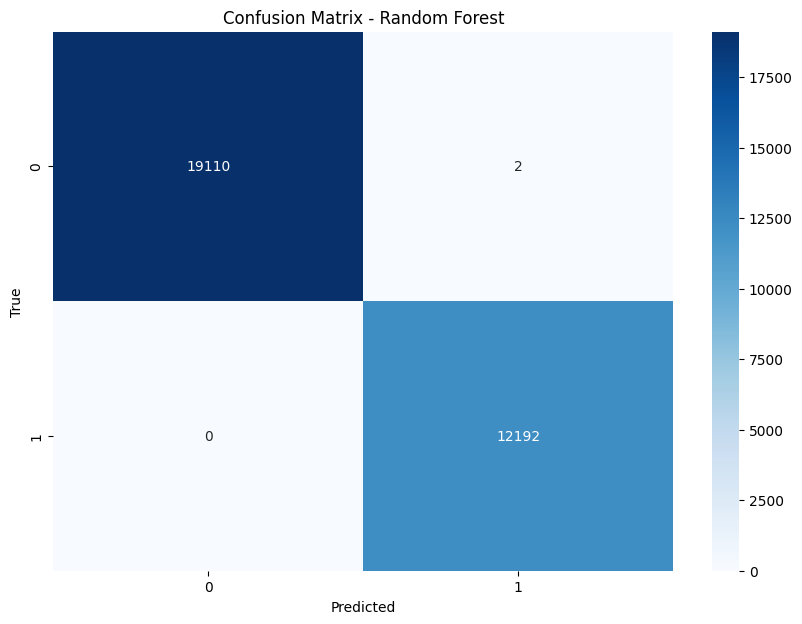

--- 44.358667850494385 seconds ---


In [ ]:
## Random Forest Classification(Without FS)
M.RandomForest()


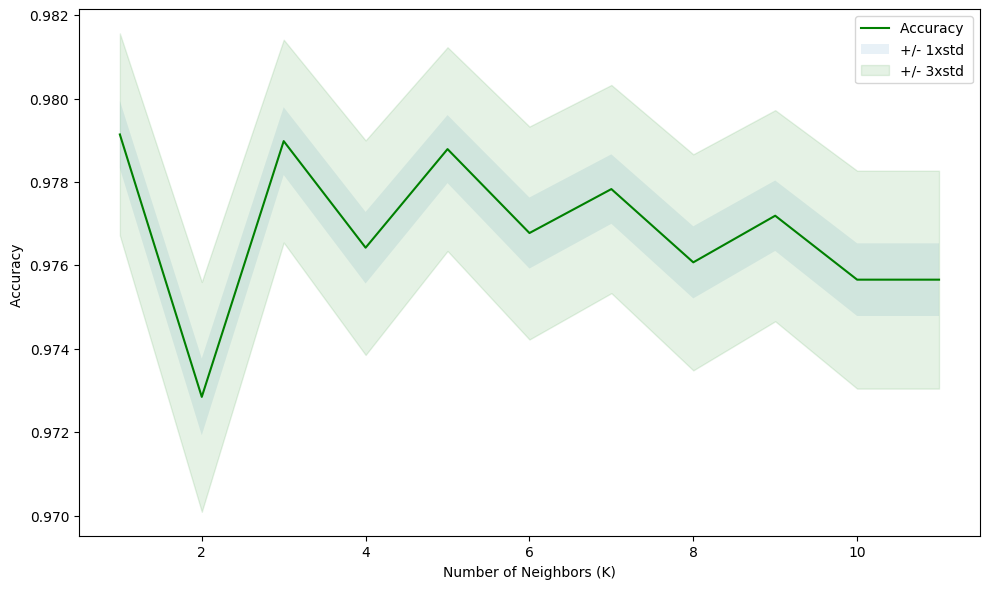

Fitting 3 folds for each of 12 candidates, totalling 36 fits
Accuracy of KNN model 98.0% 

########################################################################
              precision    recall  f1-score   support

           0       0.99      0.99      0.99     19118
           1       0.98      0.98      0.98     12186

    accuracy                           0.98     31304
   macro avg       0.98      0.98      0.98     31304
weighted avg       0.98      0.98      0.98     31304

########################################################################
--- 2468.2387783527374 seconds ---


In [ ]:
M.KNearetsNeighbor()

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import cross_val_predict, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

import time

class NewModel:
    global y

    def __init__(self, data):
        self.data = data
        X = StandardScaler().fit(self.data).transform(self.data)
        self.X_train, self.X_test, self.y_train, self.y_test = train_test_split(X, y, random_state=42, test_size=0.3)

    def LogisticRegression(self):
        solvers = ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
        best_accuracy_5fold = 0
        best_accuracy_10fold = 0
        best_solver_5fold = ''
        best_solver_10fold = ''

        for solver in solvers:
            LR = LogisticRegression(C=0.03, solver=solver)
            # Perform 5-fold cross-validation
            lr_cv_pred_5fold = cross_val_predict(LR, self.X_train, self.y_train, cv=5)
            accuracy_lr_5fold = accuracy_score(self.y_train, lr_cv_pred_5fold)
            if accuracy_lr_5fold > best_accuracy_5fold:
                best_accuracy_5fold = accuracy_lr_5fold
                best_solver_5fold = solver
                lr_conf_matrix_5fold = confusion_matrix(self.y_train, lr_cv_pred_5fold)
                lr_classification_report_5fold = classification_report(self.y_train, lr_cv_pred_5fold)

            # Perform 10-fold cross-validation
            lr_cv_pred_10fold = cross_val_predict(LR, self.X_train, self.y_train, cv=10)
            accuracy_lr_10fold = accuracy_score(self.y_train, lr_cv_pred_10fold)
            if accuracy_lr_10fold > best_accuracy_10fold:
                best_accuracy_10fold = accuracy_lr_10fold
                best_solver_10fold = solver
                lr_conf_matrix_10fold = confusion_matrix(self.y_train, lr_cv_pred_10fold)
                lr_classification_report_10fold = classification_report(self.y_train, lr_cv_pred_10fold)

        print("For 5 fold cross validation:")
        print("Best solver is:", best_solver_5fold)
        print("Best accuracy:", round(best_accuracy_5fold * 100, 2), "%")
        print("Confusion Matrix:")
        print(lr_conf_matrix_5fold)
        print("Classification Report:")
        print(lr_classification_report_5fold)

        print("\nFor 10 fold cross validation:")
        print("Best solver is:", best_solver_10fold)
        print("Best accuracy:", round(best_accuracy_10fold * 100, 2), "%")
        print("Confusion Matrix:")
        print(lr_conf_matrix_10fold)
        print("Classification Report:")
        print(lr_classification_report_10fold)

    def DecisionTree(self):
        start_time = time.time()
        tree = DecisionTreeClassifier()
        dt_search = GridSearchCV(tree, param_grid={'criterion' : ['gini', 'entropy'],
                                           'max_depth' : [2,3,4,5,6,7,8, 9, 10],
                                           'max_leaf_nodes' : [2,3,4,5,6,7,8,9,10, 11]},
                           n_jobs=-1, cv=5, scoring='accuracy', verbose=2)

        dt_search.fit(self.X_train, self.y_train)

        criterion = dt_search.best_params_['criterion']
        max_depth = dt_search.best_params_['max_depth']
        max_leaf_nodes = dt_search.best_params_['max_leaf_nodes']

        dtree = DecisionTreeClassifier(criterion=criterion,
                                       max_depth=max_depth,
                                       max_leaf_nodes=max_leaf_nodes)
        # Perform 5-fold cross-validation
        dt_cv_pred_5fold = cross_val_predict(dtree, self.X_train, self.y_train, cv=5)
        dt_conf_matrix_5fold = confusion_matrix(self.y_train, dt_cv_pred_5fold)
        dt_classification_report_5fold = classification_report(self.y_train, dt_cv_pred_5fold)
        accuracy_dt_5fold = accuracy_score(self.y_train, dt_cv_pred_5fold)

        # Perform 10-fold cross-validation
        dt_cv_pred_10fold = cross_val_predict(dtree, self.X_train, self.y_train, cv=10)
        dt_conf_matrix_10fold = confusion_matrix(self.y_train, dt_cv_pred_10fold)
        dt_classification_report_10fold = classification_report(self.y_train, dt_cv_pred_10fold)
        accuracy_dt_10fold = accuracy_score(self.y_train, dt_cv_pred_10fold)

        print("For Decision Tree - 5 fold cross validation:")
        print("Best parameters - criterion:", criterion, "max depth:", max_depth, "max_leaf_nodes:", max_leaf_nodes)
        print("Accuracy:", round(accuracy_dt_5fold * 100, 2), "%")
        print("Confusion Matrix:")
        print(dt_conf_matrix_5fold)
        print("Classification Report:")
        print(dt_classification_report_5fold)

        print("\nFor Decision Tree - 10 fold cross validation:")
        print("Best parameters - criterion:", criterion, "max depth:", max_depth, "max_leaf_nodes:", max_leaf_nodes)
        print("Accuracy:", round(accuracy_dt_10fold * 100, 2), "%")
        print("Confusion Matrix:")
        print(dt_conf_matrix_10fold)
        print("Classification Report:")
        print(dt_classification_report_10fold)

        print("--- %s seconds ---" % (time.time() - start_time))

    def RandomForest(self):
        start_time = time.time()
        RF = RandomForestClassifier(criterion='gini',
                                     n_estimators=500,
                                     min_samples_split=10,
                                     max_features='auto',
                                     oob_score=True,
                                     random_state=1,
                                     n_jobs=-1)
        # Perform 5-fold cross-validation
        rf_cv_pred_5fold = cross_val_predict(RF, self.X_train, self.y_train, cv=5)
        rf_conf_matrix_5fold = confusion_matrix(self.y_train, rf_cv_pred_5fold)
        rf_classification_report_5fold = classification_report(self.y_train, rf_cv_pred_5fold)
        accuracy_rf_5fold = accuracy_score(self.y_train, rf_cv_pred_5fold)

        # Perform 10-fold cross-validation
        rf_cv_pred_10fold = cross_val_predict(RF, self.X_train, self.y_train, cv=10)
        rf_conf_matrix_10fold = confusion_matrix(self.y_train, rf_cv_pred_10fold)
        rf_classification_report_10fold = classification_report(self.y_train, rf_cv_pred_10fold)
        accuracy_rf_10fold = accuracy_score(self.y_train, rf_cv_pred_10fold)

        print("For Random Forest - 5 fold cross validation:")
        print("Accuracy:", round(accuracy_rf_5fold * 100, 2), "%")
        print("Confusion Matrix:")
        print(rf_conf_matrix_5fold)
        print("Classification Report:")
        print(rf_classification_report_5fold)

        print("\nFor Random Forest - 10 fold cross validation:")
        print("Accuracy:", round(accuracy_rf_10fold * 100, 2), "%")
        print("Confusion Matrix:")
        print(rf_conf_matrix_10fold)
        print("Classification Report:")
        print(rf_classification_report_10fold)

        print("--- %s seconds ---" % (time.time() - start_time))

    def SVM(self):
        start_time = time.time()
        # Define parameter grid for grid search
        param_grid = {'C': [0.01, 0.1, 1, 10], 'kernel': ['linear', 'rbf']}

        # Create SVC object
        svc = SVC()

        # Perform 5-fold cross-validation with GridSearchCV
        svm_cv_5fold = GridSearchCV(svc, param_grid=param_grid, cv=5, scoring='accuracy', verbose=2)
        svm_cv_5fold.fit(self.X_train, self.y_train)

        # Get best parameters and create new SVC object
        best_params = svm_cv_5fold.best_params_
        C = best_params['C']
        kernel = best_params['kernel']
        svm = SVC(C=C, kernel=kernel)

        # Make predictions and get evaluation metrics
        svm_cv_pred_5fold = cross_val_predict(svm, self.X_train, self.y_train, cv=5)
        svm_conf_matrix_5fold = confusion_matrix(self.y_train, svm_cv_pred_5fold)
        svm_classification_report_5fold = classification_report(self.y_train, svm_cv_pred_5fold)
        accuracy_svm_5fold = accuracy_score(self.y_train, svm_cv_pred_5fold)

        # Perform 10-fold cross-validation
        svm_cv_10fold = GridSearchCV(svc, param_grid=param_grid, cv=10, scoring='accuracy', verbose=2)
        svm_cv_10fold.fit(self.X_train, self.y_train)

        best_params = svm_cv_10fold.best_params_
        C = best_params['C']
        kernel = best_params['kernel']
        svm = SVC(C=C, kernel=kernel)

        svm_cv_pred_10fold = cross_val_predict(svm, self.X_train, self.y_train, cv=10)
        svm_conf_matrix_10fold = confusion_matrix(self.y_train, svm_cv_pred_10fold)
        svm_classification_report_10fold = classification_report(self.y_train, svm_cv_pred_10fold)
        accuracy_svm_10fold = accuracy_score(self.y_train, svm_cv_pred_10fold)

        # Print results
        print("For SVM - 5 fold cross validation:")
        print("Best parameters - C:", C, "kernel:", kernel)
        print("Accuracy:", round(accuracy_svm_5fold * 100, 2), "%")
        print("Confusion Matrix:")
        print(svm_conf_matrix_5fold)
        print("Classification Report:")
        print(svm_classification_report_5fold)

        print("\nFor SVM - 10 fold cross validation:")
        print("Best parameters - C:", C, "kernel:", kernel)
        print("Accuracy:", round(accuracy_svm_10fold * 100, 2), "%")


In [ ]:
newdf = data.copy()
newdf = newdf.dropna()
X = newdf.drop(['label'], axis=1)
y = newdf.label


In [ ]:
X = pd.get_dummies(X)

In [ ]:

NewM = NewModel(X)

In [ ]:

NewM.LogisticRegression()


For 5 fold cross validation:
Best solver is: newton-cg
Best accuracy: 84.0 %
Confusion Matrix:
[[39603  4746]
 [ 6884 21454]]
Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.89      0.87     44349
           1       0.82      0.76      0.79     28338

    accuracy                           0.84     72687
   macro avg       0.84      0.83      0.83     72687
weighted avg       0.84      0.84      0.84     72687


For 10 fold cross validation:
Best solver is: liblinear
Best accuracy: 84.01 %
Confusion Matrix:
[[39585  4764]
 [ 6859 21479]]
Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.89      0.87     44349
           1       0.82      0.76      0.79     28338

    accuracy                           0.84     72687
   macro avg       0.84      0.83      0.83     72687
weighted avg       0.84      0.84      0.84     72687



In [ ]:
NewM.DecisionTree()

Fitting 5 folds for each of 180 candidates, totalling 900 fits
For Decision Tree - 5 fold cross validation:
Best parameters - criterion: gini max depth: 8 max_leaf_nodes: 11
Accuracy: 98.53 %
Confusion Matrix:
[[43337  1012]
 [   56 28282]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.98      0.99     44349
           1       0.97      1.00      0.98     28338

    accuracy                           0.99     72687
   macro avg       0.98      0.99      0.98     72687
weighted avg       0.99      0.99      0.99     72687


For Decision Tree - 10 fold cross validation:
Best parameters - criterion: gini max depth: 8 max_leaf_nodes: 11
Accuracy: 98.53 %
Confusion Matrix:
[[43337  1012]
 [   56 28282]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.98      0.99     44349
           1       0.97      1.00      0.98     28338

    accuracy                           0.9

In [ ]:
NewM.RandomForest()

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomFor

For Random Forest - 5 fold cross validation:
Accuracy: 100.0 %
Confusion Matrix:
[[44348     1]
 [    1 28337]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     44349
           1       1.00      1.00      1.00     28338

    accuracy                           1.00     72687
   macro avg       1.00      1.00      1.00     72687
weighted avg       1.00      1.00      1.00     72687


For Random Forest - 10 fold cross validation:
Accuracy: 100.0 %
Confusion Matrix:
[[44348     1]
 [    1 28337]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     44349
           1       1.00      1.00      1.00     28338

    accuracy                           1.00     72687
   macro avg       1.00      1.00      1.00     72687
weighted avg       1.00      1.00      1.00     72687

--- 548.624894618988 seconds ---


In [ ]:
NewM.SVM()

Fitting 5 folds for each of 8 candidates, totalling 40 fits
[CV] END ..............................C=0.01, kernel=linear; total time= 4.3min
[CV] END ..............................C=0.01, kernel=linear; total time= 4.1min
[CV] END ..............................C=0.01, kernel=linear; total time= 4.1min
[CV] END ..............................C=0.01, kernel=linear; total time= 4.0min
[CV] END ..............................C=0.01, kernel=linear; total time= 4.2min
[CV] END .................................C=0.01, kernel=rbf; total time= 5.6min
[CV] END .................................C=0.01, kernel=rbf; total time= 5.6min
[CV] END .................................C=0.01, kernel=rbf; total time= 5.6min
[CV] END .................................C=0.01, kernel=rbf; total time= 5.6min
[CV] END .................................C=0.01, kernel=rbf; total time= 5.6min
[CV] END ...............................C=0.1, kernel=linear; total time= 5.8min
[CV] END ...............................C=0.1, ke

In [ ]:
df1 = data1.copy()

In [ ]:
df1 = df1.dropna()


In [ ]:
df1.columns

Index(['dt', 'switch', 'src', 'dst', 'pktcount', 'bytecount', 'dur',
       'dur_nsec', 'tot_dur', 'flows', 'packetins', 'pktperflow',
       'byteperflow', 'pktrate', 'Pairflow', 'Protocol', 'port_no', 'tx_bytes',
       'rx_bytes', 'tx_kbps', 'rx_kbps', 'tot_kbps', 'label'],
      dtype='object')

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 103839 entries, 0 to 104344
Data columns (total 23 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   dt           103839 non-null  int64  
 1   switch       103839 non-null  int64  
 2   src          103839 non-null  object 
 3   dst          103839 non-null  object 
 4   pktcount     103839 non-null  int64  
 5   bytecount    103839 non-null  int64  
 6   dur          103839 non-null  int64  
 7   dur_nsec     103839 non-null  int64  
 8   tot_dur      103839 non-null  float64
 9   flows        103839 non-null  int64  
 10  packetins    103839 non-null  int64  
 11  pktperflow   103839 non-null  int64  
 12  byteperflow  103839 non-null  int64  
 13  pktrate      103839 non-null  int64  
 14  Pairflow     103839 non-null  int64  
 15  Protocol     103839 non-null  object 
 16  port_no      103839 non-null  int64  
 17  tx_bytes     103839 non-null  int64  
 18  rx_bytes     103839 non-null 

In [ ]:
#So, I will use the Feature Selection result of this pape

In [ ]:
important_features = [
    'src',
    'pktcount',
    'dst',
    'byteperflow',
    'pktperflow',
    'pktrate',
    'tot_kbps',
    'rx_kbps',
    'flows',
    'bytecount',
    'dt',
    'Protocol',
    'dur',
    'tot_dur'

                     ]


weights = [
    17.87,
    15.16,
    13.64,
    12.97,
    11.35,
    11.35,
    9.68,
    9.66,
    8.95,
    4.92,
    2.33,
    1.31,
    1.11,
    1.11
]

In [ ]:
weighted_features = pd.DataFrame({'features':important_features,
                                 'weights':weights})
weighted_features

,features,weights
0,src,17.87
1,pktcount,15.16
2,dst,13.64
3,byteperflow,12.97
4,pktperflow,11.35
5,pktrate,11.35
6,tot_kbps,9.68
7,rx_kbps,9.66
8,flows,8.95
9,bytecount,4.92


In [ ]:
### But we dont need src, dst, dt, So, we will drop them
X = df1[important_features]
y = df1.label

X = X.drop(['src', 'dst', 'dt'], axis=1)

In [ ]:
X.head()

In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
X['Protocol'] = le.fit_transform(X['Protocol'])


In [ ]:
abs(X.corr())

,pktcount,byteperflow,pktperflow,pktrate,tot_kbps,rx_kbps,flows,bytecount,Protocol,dur,tot_dur
pktcount,1.000000,0.290614,0.470065,0.470097,0.003054,0.002328,0.257467,0.675792,0.441152,0.023222,0.023283
byteperflow,0.290614,1.000000,0.812940,0.812940,0.150260,0.114963,0.246311,0.533201,0.493886,0.259843,0.259831
pktperflow,0.470065,0.812940,1.000000,0.999999,0.162416,0.124257,0.212795,0.333530,0.498099,0.329504,0.329483
pktrate,0.470097,0.812940,0.999999,1.000000,0.162461,0.124291,0.212924,0.333553,0.498319,0.329764,0.329744
tot_kbps,0.003054,0.150260,0.162416,0.162461,1.000000,0.635545,0.240285,0.076920,0.102366,0.218143,0.218268
rx_kbps,0.002328,0.114963,0.124257,0.124291,0.635545,1.000000,0.183821,0.058850,0.078340,0.166916,0.167011
flows,0.257467,0.246311,0.212795,0.212924,0.240285,0.183821,1.000000,0.244514,0.526234,0.176351,0.176352
bytecount,0.675792,0.533201,0.333530,0.333553,0.076920,0.058850,0.244514,1.000000,0.470186,0.038033,0.038034
Protocol,0.441152,0.493886,0.498099,0.498319,0.102366,0.078340,0.526234,0.470186,1.000000,0.468474,0.468417
dur,0.023222,0.259843,0.329504,0.329764,0.218143,0.166916,0.176351,0.038033,0.468474,1.000000,0.999998


<Axes: >

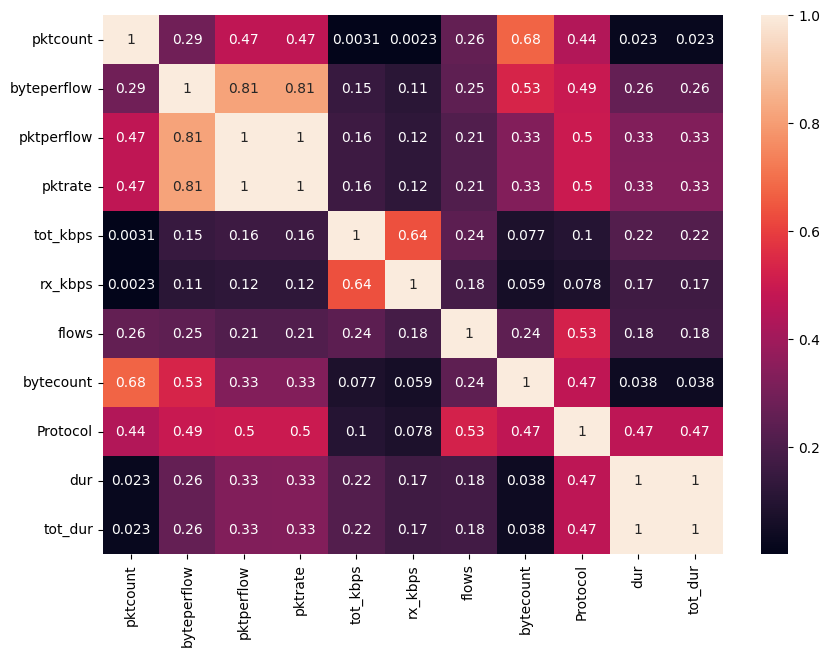

In [ ]:
fig, ax = plt.subplots(figsize=(10,7))
sns.heatmap(abs(X.corr()), annot=True)

In [ ]:
##### There some duplicated features and high correlated features.
## "dur" and "tot_dur"
## "pktperflow" and "pktrate"

X = X.drop(['dur', "pktrate", "pktperflow"], axis=1)

In [ ]:
X.columns

Index(['pktcount', 'byteperflow', 'tot_kbps', 'rx_kbps', 'flows', 'bytecount',
       'Protocol', 'tot_dur'],
      dtype='object')

<Axes: >

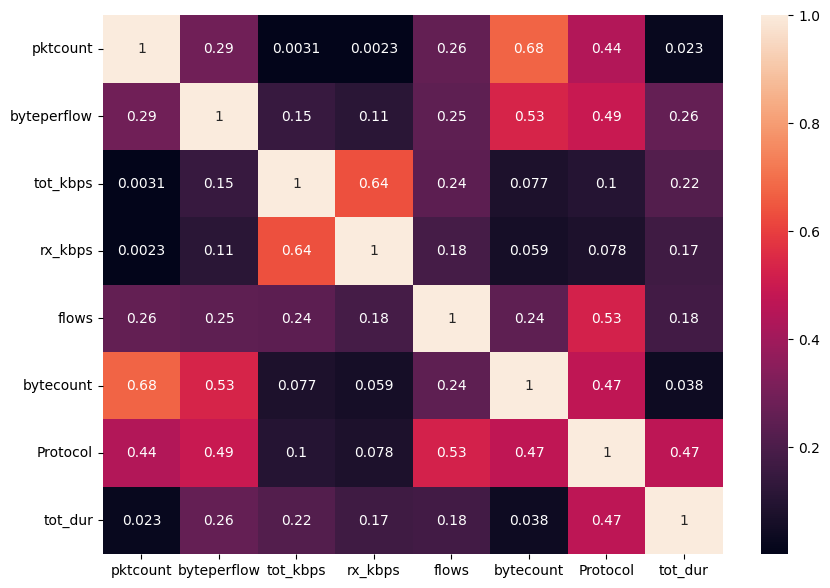

In [ ]:
fig, ax = plt.subplots(figsize=(10,7))
sns.heatmap(abs(X.corr()), annot=True)

In [ ]:
X = pd.get_dummies(X)

In [ ]:
M = Model(X)

In [ ]:
## Logistic Regression(With FS)
M.LogisticRegression()

Accuracy: 74.49% 

########################################################################
Best solver is :  newton-cg
########################################################################
              precision    recall  f1-score   support

           0       0.80      0.79      0.79     19351
           1       0.66      0.68      0.67     11801

    accuracy                           0.74     31152
   macro avg       0.73      0.73      0.73     31152
weighted avg       0.75      0.74      0.75     31152
 

########################################################################
--- 1.965770959854126 seconds --- time for LogisticRegression


In [ ]:
## Support Vector Machine
M.SupportVectorMachine()

Accuracy: 76.15%
######################################################################
Accuracy: 91.36%
######################################################################
Accuracy: 91.77%
######################################################################
Accuracy: 62.42%
######################################################################
Accuracy of SVM model 92.0% 

########################################################################
best kernel is :  rbf
########################################################################
              precision    recall  f1-score   support

           0       0.90      0.96      0.93     17722
           1       0.95      0.86      0.90     13430

    accuracy                           0.92     31152
   macro avg       0.92      0.91      0.91     31152
weighted avg       0.92      0.92      0.92     31152

########################################################################
--- 1138.8454203605652 seconds ---


In [ ]:
M.DecisionTree()

Fitting 5 folds for each of 180 candidates, totalling 900 fits
criterion: gini, max depth: 6, max_leaf: 11
The Accuracy is : 93.69%
########################################################################
              precision    recall  f1-score   support

           0       0.90      0.99      0.95     17273
           1       0.99      0.87      0.92     13879

    accuracy                           0.94     31152
   macro avg       0.95      0.93      0.94     31152
weighted avg       0.94      0.94      0.94     31152

########################################################################
--- 90.92761540412903 seconds ---


In [ ]:
M.RandomForest()

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


Accuracy of RF is : 99.23% 

########################################################################
              precision    recall  f1-score   support

           0       0.99      1.00      0.99     18905
           1       0.99      0.99      0.99     12247

    accuracy                           0.99     31152
   macro avg       0.99      0.99      0.99     31152
weighted avg       0.99      0.99      0.99     31152

########################################################################
--- 32.34625220298767 seconds ---


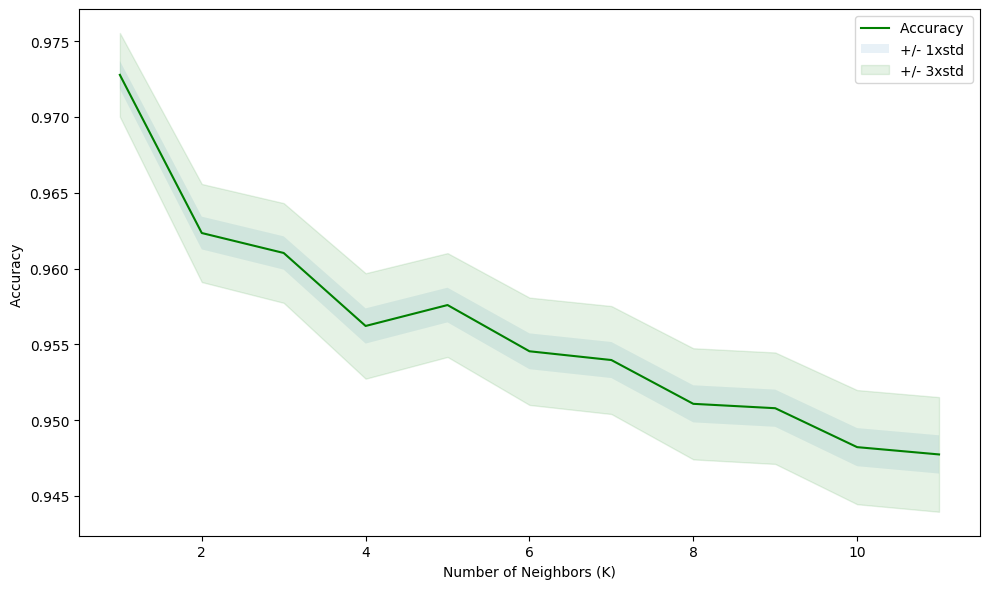

Fitting 3 folds for each of 12 candidates, totalling 36 fits
Accuracy of KNN model 97.0% 

########################################################################
              precision    recall  f1-score   support

           0       0.98      0.98      0.98     19070
           1       0.96      0.97      0.97     12082

    accuracy                           0.97     31152
   macro avg       0.97      0.97      0.97     31152
weighted avg       0.97      0.97      0.97     31152

########################################################################
--- 86.52808570861816 seconds ---


In [ ]:
##KNN with FS
M.KNearetsNeighbor()